In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
with open('csa-region-map.json') as f:
    CSA_REGION = json.load(f)
SPA_POPULATION = {
    'Antelope Valley': 397_272,
    'San Fernando': 2_248_311,
    'San Gabriel': 1_814_459 - 141_374,
    'Metro': 1_191_772,
    'West': 667_220,
    'South': 1_050_698,
    'East': 1_320_945,
    'South Bay': 1_569_560 - 467_353,
}

In [4]:
df_lacdph = pd.read_csv('LA_County_Covid19_cases_deaths_date_table.csv').drop(columns='Unnamed: 0')
df_lacdph['date_use'] = pd.to_datetime(df_lacdph['date_use'])
df_lacdph.sort_values('date_use', inplace=True)

In [5]:
df_lacdph.tail(10)

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths
9,2021-03-29,1157398,511,409.0,22086,6,11.0
8,2021-03-30,1157842,444,405.0,22095,9,10.0
7,2021-03-31,1158249,407,395.0,22102,7,10.0
6,2021-04-01,1158622,373,386.0,22109,7,9.0
5,2021-04-02,1159014,392,387.0,22110,1,7.0
4,2021-04-03,1159281,267,383.0,22114,4,6.0
3,2021-04-04,1159484,203,371.0,22124,10,6.0
2,2021-04-05,1159918,434,360.0,22129,5,6.0
1,2021-04-06,1160243,325,343.0,22130,1,5.0
0,2021-04-07,1160260,17,287.0,22131,1,4.0


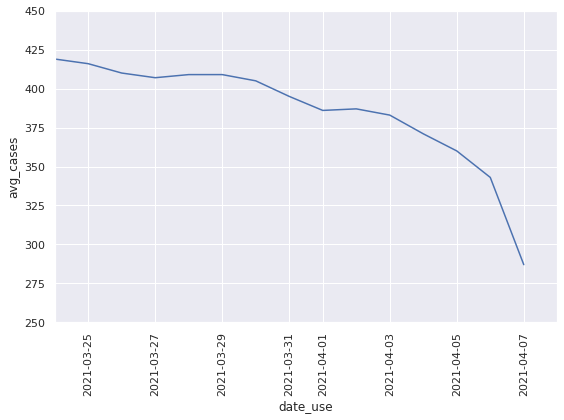

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax.tick_params('x', rotation=90)
sns.lineplot(x='date_use', y='avg_cases', data=df_lacdph, ax=ax)
last_day = df_lacdph['date_use'].max()
ax.set_xlim(last_day-pd.Timedelta(14, 'days'),
            last_day+pd.Timedelta(1, 'days'))
ax.set_ylim(250, 450)
fig.show()

In [7]:
df_csa = (pd.read_csv('LA_County_Covid19_CSA_7day_case_death_table.csv')
          .drop(columns='Unnamed: 0'))
df_csa['ep_date'] = pd.to_datetime(df_csa['ep_date'])
df_csa['case_rate_unstable'] = df_csa['case_rate_unstable'].apply(lambda x: x=='^')
df_csa['spa'] = df_csa['geo_merge'].apply(CSA_REGION.get)
df_csa = df_csa.dropna().convert_dtypes()

In [8]:
df_spa = (df_csa.groupby(['ep_date', 'spa']).sum().reset_index()
          .loc[:, ['ep_date', 'spa', 'cases_7day', 'death_7day']].copy())

In [9]:
df_spa['cases_7day_100k'] = (df_spa['cases_7day'] / df_spa['spa'].apply(SPA_POPULATION.get)) * 100_000

In [10]:
df_spa.tail(8)

,ep_date,spa,cases_7day,death_7day,cases_7day_100k
3003,2021-04-01,South,55,4,5.234615
3004,2021-04-01,South Bay,158,10,14.334875
3005,2021-04-02,East,57,5,4.315093
3006,2021-04-02,Metro,39,4,3.272438
3007,2021-04-02,San Fernando,241,11,10.719158
3008,2021-04-02,San Gabriel,84,9,5.020665
3009,2021-04-02,South,52,4,4.949091
3010,2021-04-02,South Bay,139,10,12.611061


In [11]:
df_csa['ep_date'].max()

Timestamp('2021-04-02 00:00:00')

In [15]:
df_fri = df_csa.loc[df_csa['ep_date']=='2021-04-02'].copy()

In [16]:
df_fri

,ep_date,geo_merge,cases_7day,case_7day_rate,adj_case_7day_rate,case_rate_unstable,death_7day,death_7day_rate,adj_death_7day_rate,death_rate_unstable,population,spa
5,2021-04-02,City of Baldwin Park,15,20,18,True,1,1,2,^,76769,San Gabriel
6,2021-04-02,City of Bell,5,14,14,True,1,3,3,^,36332,East
10,2021-04-02,City of Burbank,27,25,25,False,3,3,2,^,107180,San Fernando
14,2021-04-02,City of Claremont,3,8,7,True,1,3,1,^,36484,San Gabriel
26,2021-04-02,City of Glendale,41,20,19,False,1,0,0,^,206493,San Fernando
29,2021-04-02,City of Hawthorne,20,23,22,False,1,1,1,^,88787,South Bay
33,2021-04-02,City of Inglewood,22,19,18,False,1,1,1,^,113582,South Bay
38,2021-04-02,City of Lakewood,27,34,35,False,2,2,2,^,80362,South Bay
47,2021-04-02,City of Montebello,15,23,24,True,1,2,2,^,64375,East
48,2021-04-02,City of Monterey Park,5,8,10,True,1,2,1,^,62262,San Gabriel


In [18]:
df_spa['spa'].unique()

array(['Metro', 'San Fernando', 'San Gabriel', 'West', 'East', 'South',
       'South Bay', 'Antelope Valley'], dtype=object)

In [19]:
df_spa.shape

(3011, 5)